## Assignment 4

Nama   : Salsabila Awwaliyyah Lestari

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!gdown 1_2DdFzGJB-Vty8zlgdVO65NqUAnJYX6J

Downloading...
From: https://drive.google.com/uc?id=1_2DdFzGJB-Vty8zlgdVO65NqUAnJYX6J
To: /content/heart disease - Sheet1.csv
100% 6.50k/6.50k [00:00<00:00, 18.5MB/s]


In [10]:
data = pd.read_csv('heart disease - Sheet1.csv')

In [11]:
# cek head dari data
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,0,0,138,294,1,1,106,0,"1,9",1,3,2,0
1,58,0,0,100,248,0,0,122,0,1,1,0,2,1
2,54,1,0,122,286,0,0,116,1,"3,2",1,2,2,0
3,71,0,0,112,149,0,1,125,0,"1,6",1,0,2,1
4,34,0,1,118,210,0,1,192,0,"0,7",2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,55,0,1,135,250,0,0,161,0,"1,4",1,0,2,1
165,64,1,2,140,335,0,1,158,0,0,2,0,2,0
166,68,0,2,120,211,0,0,115,0,"1,5",1,0,2,1
167,44,0,2,108,141,0,1,175,0,"0,6",1,0,2,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       169 non-null    int64 
 1   sex       169 non-null    int64 
 2   cp        169 non-null    int64 
 3   trestbps  169 non-null    int64 
 4   chol      169 non-null    int64 
 5   fbs       169 non-null    int64 
 6   restecg   169 non-null    int64 
 7   thalach   169 non-null    int64 
 8   exang     169 non-null    int64 
 9   oldpeak   169 non-null    object
 10  slope     169 non-null    int64 
 11  ca        169 non-null    int64 
 12  thal      169 non-null    int64 
 13  target    169 non-null    int64 
dtypes: int64(13), object(1)
memory usage: 18.6+ KB


In [13]:
# Descriptive statistics of the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,53.355030,0.562130,1.195266,128.846154,242.573964,0.136095,0.514793,155.065089,0.207101,1.544379,0.491124,1.881657,0.763314
std,9.619146,0.497599,0.995694,15.173599,44.730631,0.343908,0.513004,20.820989,0.406432,0.576923,0.831796,0.358844,0.426311
min,29.000000,0.000000,0.000000,94.000000,141.000000,0.000000,0.000000,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,143.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,53.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,159.000000,0.000000,2.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,138.000000,271.000000,0.000000,1.000000,171.000000,0.000000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,2.000000,3.000000,2.000000,1.000000


In [14]:
#Cek Missing Value
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

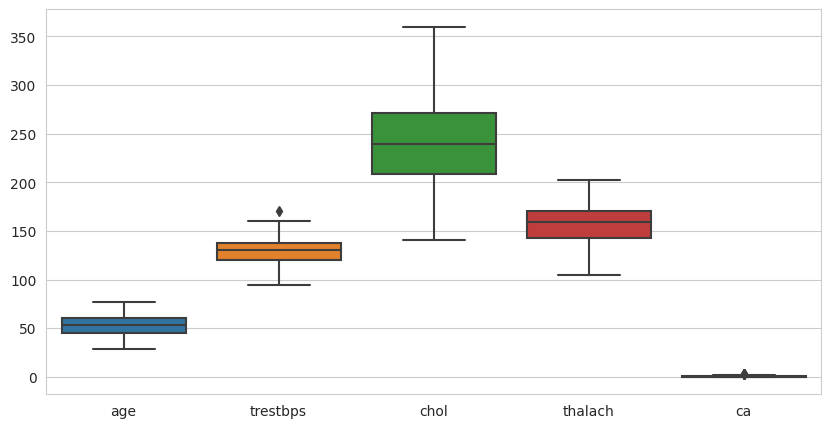

In [17]:
# menampilkan boxplot dari feature numerik untuk mengecek outlier
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']])

<Axes: xlabel='target', ylabel='count'>

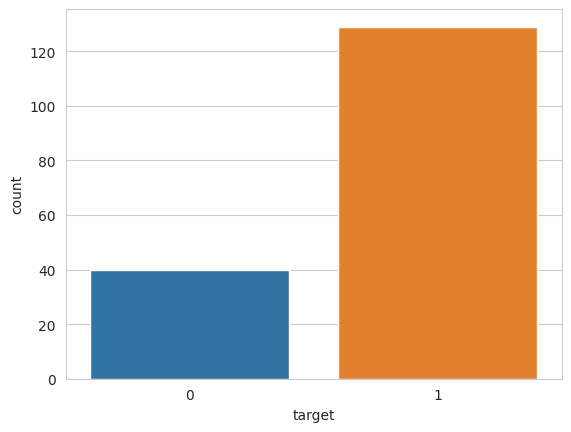

In [18]:
# Menampilkan jumlah data per target class 
sns.set_style('whitegrid')
sns.countplot(x=data['target'])

<ipython-input-19-9182b20319fb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


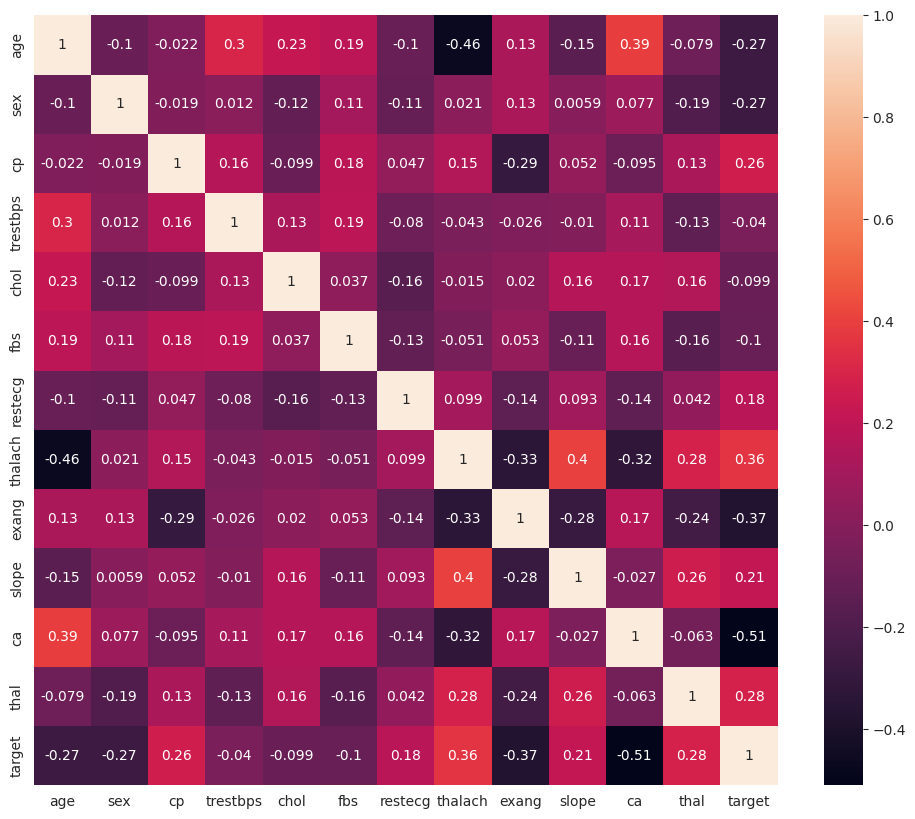

In [19]:
# Menampilkan heatmap korelasi antar fitur
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Feature enginering

In [28]:
# Feature engineering dengan mengubah categorical variables menjadi
cp = pd.get_dummies(data['cp'], prefix="cp")
thal = pd.get_dummies(data['thal'], prefix="thal")
slope = pd.get_dummies(data['slope'], prefix="slope")

In [29]:
data_ = [data, cp, thal, slope]
data = pd.concat(data_, axis=1)
data = data.drop(columns=['cp', 'thal', 'slope'])
data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,slope_0,slope_1,slope_2
0,62,0,138,294,1,1,106,0,"1,9",3,...,1,0,0,0,0,0,1,0,1,0
1,58,0,100,248,0,0,122,0,1,0,...,1,0,0,0,0,0,1,0,1,0
2,54,1,122,286,0,0,116,1,"3,2",2,...,1,0,0,0,0,0,1,0,1,0
3,71,0,112,149,0,1,125,0,"1,6",0,...,1,0,0,0,0,0,1,0,1,0
4,34,0,118,210,0,1,192,0,"0,7",0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,55,0,135,250,0,0,161,0,"1,4",0,...,0,1,0,0,0,0,1,0,1,0
165,64,1,140,335,0,1,158,0,0,0,...,0,0,1,0,0,0,1,0,0,1
166,68,0,120,211,0,0,115,0,"1,5",0,...,0,0,1,0,0,0,1,0,1,0
167,44,0,108,141,0,1,175,0,"0,6",0,...,0,0,1,0,0,0,1,0,1,0


# Automate EDA dataprep

In [30]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
create_report(data).show() 

Output hidden; open in https://colab.research.google.com to view.

Insight yang diambil

- Terlihat bahwa data imbalance dimana banyaknya pasien dengan fitur target kategori 1, yaitu yang memiliki penyakit jantung lebih banyak dibandingkan banyaknya pasien dengan fitur target kategori 0, yaitu yang tidak memiliki penyakit jantung.


- Dari EDA yang telah dilakukan dapat diketahui bahwa fitur thal (detak jantung maksimum yang tercapai) dengan korelasi 0,39 khususnya thal_2 dengan korelasi 0,56  merupakan fitur yang paling berpengaruh terhadap penggolongan apakah pasien memiliki penyakit jantung atau tidak (fitur target). 

# Hypotesis


Hipotesis null: Tidak ada hubungan antara variabel-variabel yang ada dalam dataset heart disease dengan risiko terkena penyakit jantung.


Hipotesis alternatif: Ada hubungan antara variabel-variabel yang ada dalam dataset heart disease dengan risiko terkena penyakit jantung.

# **1. Compare and contrast the several models you have created for the last assignment**

Decission Tree Classifier, Random Forest Classifier, dan CatBoost Classifier adalah model machine learning yang digunakan untuk tugas klasifikasi. Meskipun mereka memiliki kesamaan, namun ada beberapa perbedaan kunci antara mereka.


1. Random Forest Classifier:
Random Forest adalah metode ensemble learning yang menggabungkan beberapa decision tree untuk meningkatkan akurasi prediksi. Algoritma ini bekerja dengan melatih beberapa decision tree pada subset acak dari data input, dan kemudian menggabungkan output mereka untuk membuat prediksi akhir. Setiap tree dilatih pada subset acak dari data input dan subset acak dari fitur. Dengan menggunakan subset acak, itu membantu mengurangi kemungkinan overfitting dan membuat model lebih kuat.

Kelebihan:
- Akurasi yang lebih baik dibandingkan dengan decision tree
- Dapat menangani data dengan dimensi tinggi
- Mengurangi risiko overfitting
- Dapat menangani data yang hilang

Kekurangan:
- Mahal dalam komputasi untuk dilatih
- Sulit untuk diinterpretasikan

2. CatBoost Classifier:
CatBoost adalah algoritma gradient boosting yang dapat menangani fitur kategorikal dan secara otomatis menangani nilai yang hilang. Algoritma ini bekerja dengan menambahkan decision tree secara berulang ke ensemble, dengan setiap pohon baru dilatih pada residual dari pohon sebelumnya. CatBoost menggunakan kombinasi ordered boosting, yang mengurutkan variabel kategorikal untuk meningkatkan kecepatan pelatihan, dan algoritma yang unik untuk menangani data yang hilang.

Kelebihan:
- Dapat menangani fitur kategorikal dan data yang hilang
- Kinerja yang baik dengan hyperparameter default
- Waktu pelatihan yang cepat dibandingkan dengan algoritma gradient boosting lainnya
- Mengatasi masalah bias pada data yang tidak seimbang.

Kekurangan:
- Membutuhkan waktu yang cukup lama untuk melatih model pada dataset yang sangat besar.
- Tidak sepenuhnya dapat diinterpretasikan seperti decision tree.


3. Decision Tree Classifier:
Decision tree adalah algoritma klasifikasi sederhana dan kuat. Algoritma ini bekerja dengan membagi dataset input menjadi subset yang lebih kecil berdasarkan fitur tertentu, dan secara rekursif menerapkan prosedur yang sama pada setiap subset sampai kriteria berhenti terpenuhi. Setiap subset membuat cabang dalam pohon, dan partisi akhir disebut simpul daun. Decision tree dapat menangani data kategorikal dan kontinu, serta dapat dengan mudah divisualisasikan dan diinterpretasikan.

Kelebihan:
- Sederhana dan mudah dipahami
- Dapat menangani data kategorikal dan kontinu
- Dapat dengan mudah divisualisasikan dan diinterpretasikan

Kekurangan:
- Cenderung overfitting pada data training
- Sensitif terhadap variasi kecil dalam data training
- Terbatas dalam kemampuan ekspresifnya

Kesimpulannya, decision tree cocok untuk dataset yang relatif sederhana dan kecil, sedangkan random forest dan CatBoost lebih cocok untuk dataset yang lebih besar dan kompleks dengan fitur kategorikal atau yang memiliki data yang hilang. Random forest dan CatBoost juga memiliki performa yang lebih baik daripada decision tree, namun kekurangan mereka adalah biaya komputasi yang lebih tinggi dan kurang interpretatif dibandingkan dengan decision tree. 

In [31]:
# Pisahkan feature lainnya dengan fitur target
X = data.drop('target', axis=1)
y = data['target']

In [32]:
from sklearn import preprocessing

# Proses Scalling, agar angka berada diantara 0-1
# membuat variable scaler yang berisi objek MinMaxScaler 
scaler = preprocessing.MinMaxScaler()

# fit scaler ke features, transform features ke versi scaled
X = pd.DataFrame(scaler.fit_transform(X))

ValueError: ignored

In [33]:
# Memecah/membagi data menjadi data train dan daya test dataset dengan rasio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# **2. Do hyperparameter tuning**

# Cross validation, bootstrapping and 3 models (Random Forest, catboost and Decission Tree)

In [34]:
# Cross Validation untuk Model ke Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Modelling dengan Random Forest dan Boostrap
rfc = RandomForestClassifier(bootstrap=True, random_state=28)

#Parameter 
params = [{'max_depth': list(range(10, 15)), 'max_features': ['log2', 'sqrt']}]

#Cross Validation menggunakan Grid Search Cv
grid_search_cv = GridSearchCV(rfc, params, cv = 10, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

ValueError: ignored

Didapatkan :

Best hyperparameter untuk model Random Forest Classifier adalah {'max_depth': 12, 'max_features': 'log2'} 

Menghasilkan akurasi validasi 0.991549295774648

In [35]:
# Modelling, cross validation, bootstrapping untuk Model Cat Boost Classifier
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(silent=True)

params = [{'max_depth': list(range(4, 10)), 'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'], 'loss_function': ['Logloss', 'CrossEntropy']}]
grid_search_cv = GridSearchCV(cbc, params, cv = 10, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)


ValueError: ignored

Didapatkan :    

Best hyperparameter untuk model Cat Boost Classifier adalah {'bootstrap_type': 'Bayesian', 'loss_function': 'Logloss', 'max_depth': 7} 

Menghasilkan akurasi validasi 0.991549295774648

In [ ]:
# Modelling, cross validation, bootstrapping untuk Model Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=33)
params = [{'max_depth': list(range(1, 10, 2)), 'min_samples_split': list(range(10,50,20))}]
grid_search_cv = GridSearchCV(dtc, params, cv = 10, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

Didapatkan :    

Best hyperparameter untuk model Decision Tree Classifier adalah {'max_depth': 7, 'min_samples_split': 10}

Menghasilkan akurasi validasi 0.9267605633802816

# **3. Predict how well your model is in a test dataset**

# Prediksi dan Evaluasi

Model evaluation yang akan digunakan yaitu:
1. Confusion Matrix

    Cara menampilkan/memvisualisasikan hasil prediksi dari algoritma klasifikasi pada Machine Learning yang membandingkan nilai prediksi hasil pemodelan dengan nilai aktual.

2. Akurasi

    Mengukur berapa seringkah model membuat prediksi yang benar.

3. Precision 

    Mengukur seberapa baik model mengidentifikasi positif benar diantara semua prediksi positif.

4. Recall

    Mengukur seberapa baik model mengidentifikasi positif benar diantara semua kasus positif yang sebenarnya.

5. F1-Score

    Rata-rata harmonik dari presisi dan recall, yang mencoba menemukan keseimbangan diantara keduanya.

## 3.1 Menggunakan Random Forest Classifier


In [27]:
# Membuat model Random Forest Classifier menggunakan best hyperparameter yang didapat dari proses sebelumnya
rfc = RandomForestClassifier(bootstrap=True, random_state=28, max_depth=12, max_features='log2')

# Me-train model
rfc.fit(X_train, y_train)

# Prediksi dengan menggunakan data test
y_pred = rfc.predict(X_test)

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report


# Tampilkan classification report
print(classification_report(y_test, y_pred))

**Insight : **

Dari classification report diatas, terlihat bahwa akurasi model Random Forest Classifier sebesar 100%.

In [ ]:
from sklearn.metrics import confusion_matrix
# Menampilkan confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,3))
ax = plt.subplot()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

**Insight :**

Dari tabel confusion matrix yang dihasilkan, bisa disimpulkan bahwa hasil prediksi True Negative 46.07% dan True Positive 53.93%

## 3.2 Menggunakan Cat Boost Classifier

In [ ]:
# Membuat model 2 (Cat Boost Classifier) menggunakan best hyperparameter yang didapat dari proses sebelumnya
cbc = CatBoostClassifier(silent=True, bootstrap_type='Bayesian', loss_function='Logloss', max_depth=7)

# Me train model
cbc.fit(X_train, y_train)

# prediksi dengan menggunakan data test
y_pred = cbc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
# Menampilkan classification report
print(classification_report(y_test, y_pred))

**Insight :**

Dari classification report diatas, terlihat bahwa akurasi model Random Forest Classifier sebesar 100%.

In [ ]:
from sklearn.metrics import confusion_matrix
# Menampilkan confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,3))
ax = plt.subplot()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

**Insight :**

Dari tabel confusion matrix yang dihasilkan, bisa disimpulkan bahwa hasil prediksi True Negative 46.07% dan True Positive 53.93%

## 3.3 Menggunakan Decision Tree Classifier

In [ ]:
# Membuat model 3 (Decision Tree Classifier) menggunakan best hyperparameter yang didapat sebelumnya
dtc = dtc = DecisionTreeClassifier(max_depth=9, min_samples_split=10, random_state=28)
# train model
dtc.fit(X_train, y_train)
# prediksi dengan menggunakan data test
y_pred = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
# Menampilkan classification report
print(classification_report(y_test, y_pred))

**Insight :**

Dari classification report diatas, terlihat bahwa akurasi model Decision Tree Classifier sebesar 96%.

In [ ]:
from sklearn.metrics import confusion_matrix
# Menampilkan confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,3))
ax = plt.subplot()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

**Insight :**


Dari tabel confusion matrix yang dihasilkan, bisa disimpulkan bahwa hasil prediksi True Negative 42,70% dan True Positive 53.37%

### Kesimpulan 

Dari hasil evaluasi kedua model diatas, yaitu Random Forest Classifier dan Cat Boost Classifier terlihat bahwa keduanya memiliki performansi yang baik dalam case ini dan menghasilkan akurasi 100%, serta precision, recall, dan F1-Score 1.00. 

Kedua model sudah berhasil memprediksi fitur target dengan benar (sesuai dengan nilai aktual).

# 4.Create LEARNING CURVES to diagnose machine learning model performance.

Kemampuan model untuk mengoptimalkan 
class-assignment probability ini diukur dalam evaluasi 
kinerja model. Selain cross validation dan bootstrapping, 
tool lain yang dapat digunakan adalah learning curves.

Learning curves menunjukkan hubungan antara ukuran 
training dataset. Dengan metode evaluasi yang digunakan 
(RMSE, akurasi, dll) terhadap training dataset dan 
validation (atau cross validation) dataset. Melalui learning 
curves, kita dapat mendeteksi apakah model yang sedang 
dibangun memiliki bias atau varian.

Apabila learning curves menunjukkan hasil di sebelah kiri 
garis optimum, hal ini berarti model yang sedang dibangun 
memiliki tingkat bias yang tinggi. Tingkat error dalam 
training dan generalization sangat tinggi. 

Apabila learning curves menunjukkan hasil di sebelah kanan 
garis optimum, hal ini berarti model yang sedang dibangun 
memiliki tingkat varian yang tinggi.

## 4.1 Model Random Forest Classifier

In [ ]:
from sklearn.model_selection import learning_curve

# Membuat model 1 (Random Forest Classifier) menggunakan best hyperparameter yang didapat sebelumnya
rfc = RandomForestClassifier(bootstrap=True, random_state=28, max_depth=12, max_features='log2')

# Menentukan parameter learning curve
train_sizes, train_scores, test_scores = learning_curve(rfc, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Mencari rata-rata dan standar deviasi dari skor train dan test setiap ukuran data training
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Membuat plot learning curve
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Cross-validation accuracy')

# Menambahkan area untuk standar deviasi (yang warna hijau muda di sekitar garis)
plt.fill_between(train_sizes, train_mean - train_std,train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Menambahkan label dan legend pada plot
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve Random Forest Classifier')
plt.legend(loc='best')

# Menampilkan plot
plt.show()

**Insight** :

Dalam grafik diatas tidak terjadi overfitting atau underfitting, grafik diatas merupakan grafik model yang memiliki tradeoff varians bias yang baik.


## 4.2 Model Cat Boost Classifier

In [ ]:
# Membuat model 2 (Cat Boost Classifier) menggunakan best hyperparameter yang didapat sebelumnya
cbc = CatBoostClassifier(silent=True, bootstrap_type='Bayesian', loss_function='Logloss', max_depth=7)

# Menentukan parameter learning curve
train_sizes, train_scores, test_scores = learning_curve(cbc, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Mencari rata-rata dan standar deviasi dari skor train dan test setiap ukuran data training
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Membuat plot learning curve
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Cross-validation accuracy')

# Menambahkan area untuk standar deviasi (orange muda)
plt.fill_between(train_sizes, train_mean - train_std,train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Menambahkan label dan legend pada plot
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve Cat Boost Classifier')
plt.legend(loc='best')

# Menampilkan plot
plt.show()

**Insight** :

Dalam grafik diatas tidak terjadi overfitting atau underfitting, grafik diatas merupakan grafik model yang memiliki tradeoff varians bias yang baik.
Ditunjukkan dengan sangat kecil perbedaan antara kurva training accuracy dengan cross validation accuracy.

## 4.3 Model Decission Tree

In [ ]:
# Membuat model 3 (Decision Tree Classifier) menggunakan best hyperparameter yang didapat sebelumnya
dtc = DecisionTreeClassifier(max_depth=9, min_samples_split=10, random_state=28)

# Menentukan parameter learning curve
train_sizes, train_scores, test_scores = learning_curve(dtc, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Mencari rata-rata dan standar deviasi dari skor train dan test setiap ukuran data training
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Membuat plot learning curve
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Cross-validation accuracy')

# Menambahkan area untuk standar deviasi
plt.fill_between(train_sizes, train_mean - train_std,train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Menambahkan label dan legend pada plot
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve Decision Tree Classifier')
plt.legend(loc='best')

# Menampilkan plot
plt.show()

**Insight** :

Learning curve di atas menunjukkan bahwa model mengalami overfitting.
akurasi training lebih besar dari akurasi validasi.


## Kesimpulan

Dari ketiga model diatas, model dengan kinerja yang paling baik adalah Random forest dan cat boost.

# 5.Create the ROC analysis

Kurva ROC juga merupakan plot grafis yang digunakan 
untuk menunjukkan kemampuan diagnostik dari 
pengklasifikasi biner. Semakin dekat kurva mengikuti batas kiri dan batas atas 
ruang ROC, semakin akurat pengklasifikasi.

## 5.1 Model Random Forest Classifier

In [ ]:
from sklearn.metrics import roc_curve
# Membuat model 1 (Random Forest Classifier) menggunakan best hyperparameter yang didapat sebelumnya
rfc = RandomForestClassifier(bootstrap=True, random_state=28, max_depth=12, max_features='log2')
# train model
rfc.fit(X_train, y_train)

# Membuat roc curve
train_probs = rfc.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = rfc.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Insight **

Dapat kita lihat bahwa kurva berada di batas kiri dan batas atas ROC atau berada di  titik 0,1, dapat disimpulkan pengklasifikasian model sangat akurat

## 5.2 Model Cat Boost Classifier

In [ ]:
# Membuat model 2 (Cat Boost Classifier) menggunakan best hyperparameter yang didapat sebelumnya
cbc = CatBoostClassifier(silent=True, bootstrap_type='Bayesian', loss_function='Logloss', max_depth=7)
# train model
cbc.fit(X_train, y_train)

# Membuat roc curve
train_probs = cbc.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = cbc.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Insight **

Dapat kita lihat bahwa kurva berada di batas kiri dan batas atas ROC atau berada di titik 0,1, dapat disimpulkan pengklasifikasian model sangat akurat.

## 5.3 Model Decission Tree

In [ ]:
# Membuat model 3 (Decision Tree Classifier) menggunakan best hyperparameter yang didapat sebelumnya
dtc = DecisionTreeClassifier(max_depth=9, min_samples_split=10, random_state=28)
# train model
dtc.fit(X_train, y_train)

# Membuat roc curve
train_probs = dtc.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_train, train_probs1)

test_probs = dtc.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Insight **

Dapat kita lihat bahwa kurva berada mendekati batas kiri dan batas atas ROC atau berada di titik 0,1, dapat disimpulkan pengklasifikasian model semakin  akurat.

## Hasil Analisis

Dalam konteks ini, kurva ROC digunakan untuk mengevaluasi seberapa baik model dapat membedakan antara pasien yang terinfeksi penyakit jantung (kelas positif atau  target class 1) dan pasien yang tidak terinfeksi penyakit jantung (kelas negatif atau target class 0) pada data uji. 

Semakin dekat kurva ROC ke titik (0,1), semakin baik model dalam membedakan antara kelas positif dan negatif. Oleh karena itu, dari hasil kurva ROC yang dihasilkan oleh model Random Forest Classifier dan model Cat Boost Classifier yang mendekati titik (0,1), dapat kita disimpulkan bahwa kedua model tersebut lebih baik dalam membedakan antara kelas positif dan negatif dibandingkan dengan model Decision Tree Classifier.

# 6.Select the model that you think performs the best and give a justification of why you think the model is the best for the study case you choose. 

Dari hasil evaluasi ketiga model di atas, dapat dilihat bahwa semuanya memiliki kinerja yang bagus pada kasus yang diuji, terutama pada model random forest classifier dan cat boost classifier yang mampu mencapai akurasi 100%, serta precision, recall, dan F1-Score 1,00. Kedua model tersebut berhasil memprediksi fitur target dengan benar, sesuai dengan nilai aktual. Sementara itu, model decision tree classifier juga menunjukkan kinerja yang baik dengan mencapai akurasi 96%.

## Feature Important

In [ ]:
# fungsi untuk membuat dataframe feature important
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# Memplotting dataframe feature imprtant(Barchart Horizontal) 
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [ ]:
base_imp = imp_df(X_train.columns, rfc.feature_importances_)
base_imp

In [ ]:
idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
nama_kolm = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2']

In [ ]:
base_imp = base_imp.replace(idx, nama_kolm)
base_imp

In [ ]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

Dari gambar diatas didapatkan insight 

Bahwa Terdapat beberapa Feature yang paling penting yaitu :    

1. Cha
    Jumlah pembuluh utama
2. Target
3. Oldpeak
4. Thal_1